In [2]:
import pandas as pd
import numpy as np
import seaborn as sns       # 시각화 패키지
import matplotlib.pyplot as plt

# matplotlib 한글 안깨지게 하는 코드
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\Windows\Fonts\HMKMMAG.TTF'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

df = pd.read_csv('eda_data_files\상가업소정보_201912_01.csv',sep='|')
df.head(2)



,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [6]:
df.columns
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

<Axes: >

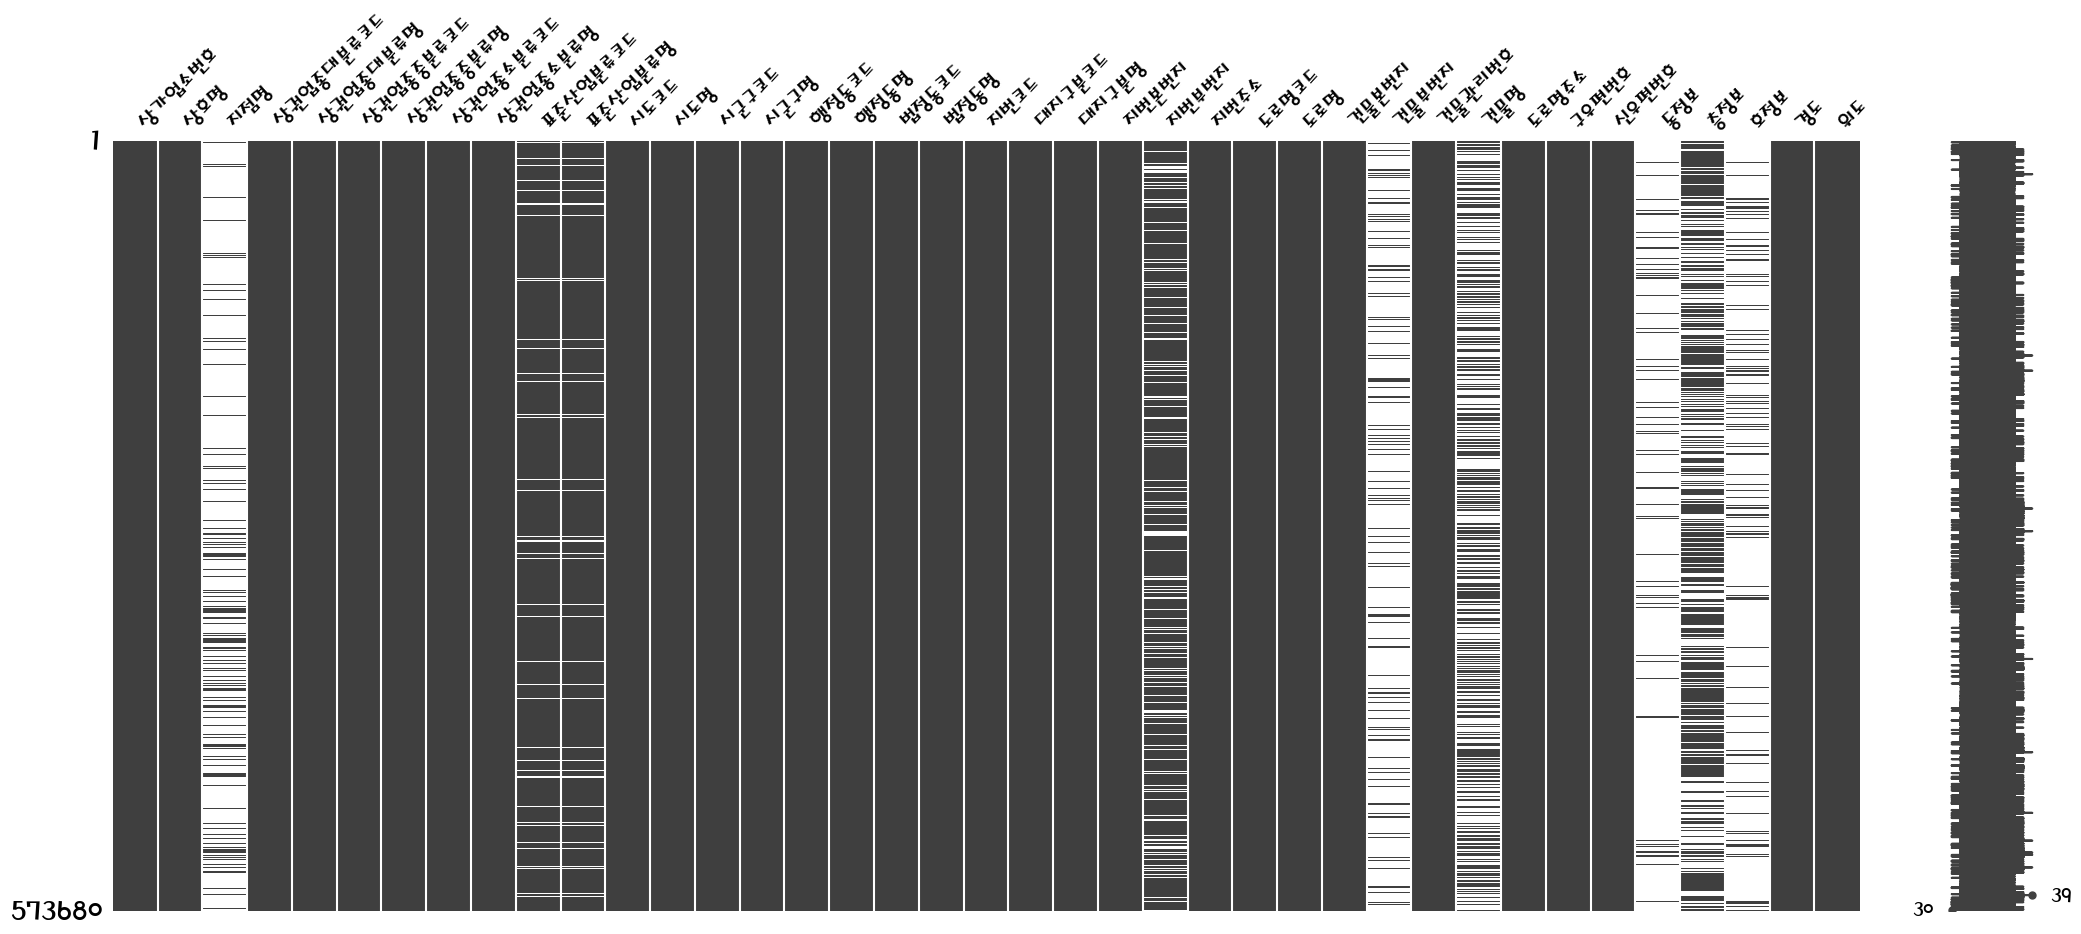

In [9]:
import missingno as msno

msno.matrix(df)

In [12]:
# nan 비율이 높은 칼럼 제거

df.isnull().sum().sort_values(ascending=False)
(df.isnull().sum()/len(df)).sort_values(ascending=False)

동정보          0.911351
건물부번지        0.874515
지점명          0.866347
호정보          0.851370
건물명          0.537010
층정보          0.394912
지번부번지        0.172145
표준산업분류코드     0.059946
표준산업분류명      0.059946
신우편번호        0.000016
상호명          0.000002
구우편번호        0.000000
지번본번지        0.000000
도로명주소        0.000000
건물관리번호       0.000000
경도           0.000000
건물본번지        0.000000
도로명          0.000000
도로명코드        0.000000
지번주소         0.000000
상가업소번호       0.000000
지번코드         0.000000
대지구분명        0.000000
시도코드         0.000000
상권업종대분류코드    0.000000
상권업종대분류명     0.000000
상권업종중분류코드    0.000000
상권업종중분류명     0.000000
상권업종소분류코드    0.000000
상권업종소분류명     0.000000
시도명          0.000000
대지구분코드       0.000000
시군구코드        0.000000
시군구명         0.000000
행정동코드        0.000000
행정동명         0.000000
법정동코드        0.000000
법정동명         0.000000
위도           0.000000
dtype: float64

In [13]:
(df.isnull().sum()/len(df)).sort_values(ascending=False).index

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명', '신우편번호', '상호명', '구우편번호', '지번본번지', '도로명주소', '건물관리번호', '경도',
       '건물본번지', '도로명', '도로명코드', '지번주소', '상가업소번호', '지번코드', '대지구분명', '시도코드',
       '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명', '상권업종소분류코드',
       '상권업종소분류명', '시도명', '대지구분코드', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드',
       '법정동명', '위도'],
      dtype='object')

In [ ]:
df.drop(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], axis=1, inplace=True)

<Axes: >

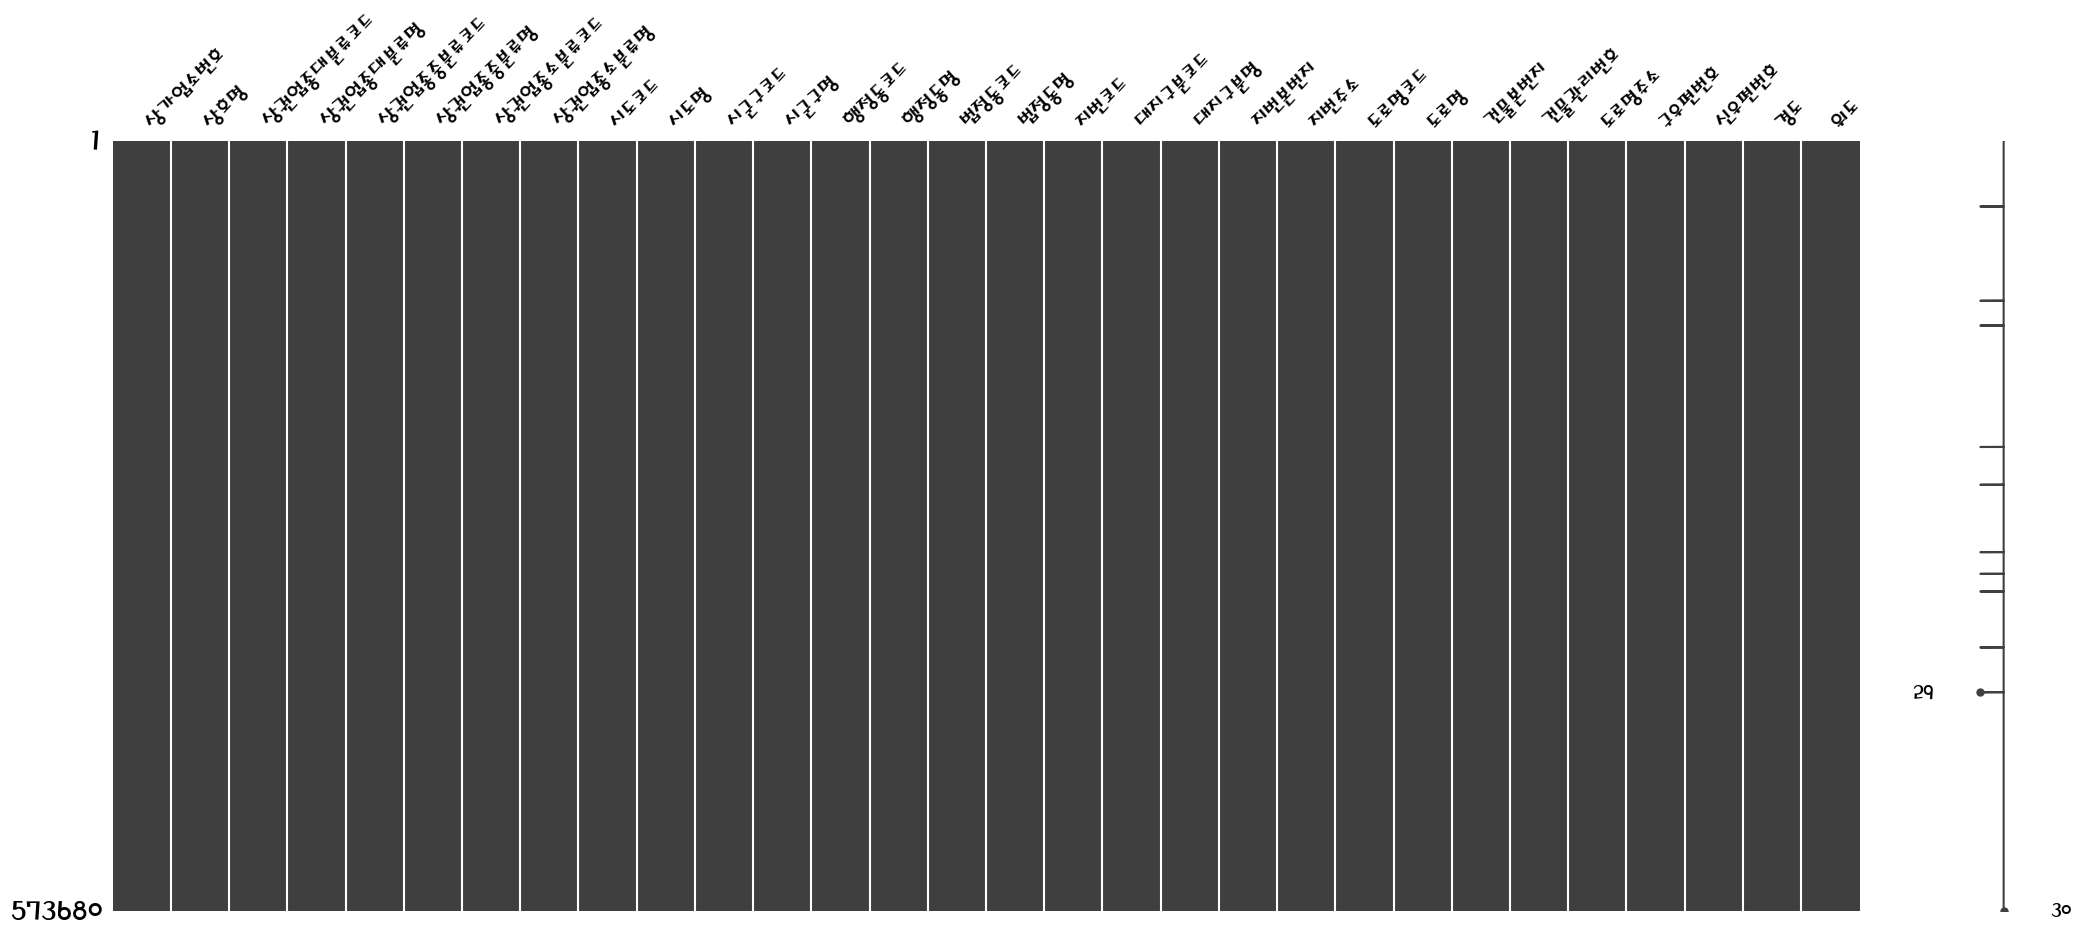

In [16]:
msno.matrix(df)

In [17]:
# 칼럼에 '코드', '번호'가 포함된 칼럼을 제거...
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [26]:
s = pd.Series(df.columns)
drop_cols = s[s.str.contains('코드|번호')].values     ## 정규표현식 사용 가능

In [27]:
df.drop(drop_cols, axis=1, inplace=True)

In [29]:
df.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711


In [31]:
df['상권업종대분류명'].unique()
df['상권업종중분류명'].unique()
df['상권업종소분류명'].unique()

array(['유흥주점', '커피점/카페', '패스트푸드', '대중목욕탕/휴게', '일식/수산물', '분식', '한식',
       '음/식료품소매', '건강/미용식품', '선물/팬시/기념품', '양식', '중식', '종합소매점', '병원',
       '화장품소매', '학원-어학', '의복의류', 'PC/오락/당구/볼링등', '별식/퓨전요리', '학원-자격/국가고시',
       '도서관/독서실', '가정/주방/인테리어', '학원-음악미술무용', '무도/유흥/가무', '이/미용/건강',
       '사진/광학/정밀기기소매', '세탁/가사서비스', '닭/오리요리', '책/서적/도서', '예식/의례/관혼상제',
       '광고/인쇄', '학원-예능취미체육', '운송/배달/택배', '기타음식업', '부동산중개', '주유소/충전소',
       '철물/난방/건설자재소매', '유아교육', '주택수리', '사무/문구/컴퓨터', '약국/한약방', '물품기기대여',
       '자동차/이륜차', '자동차/자동차용품', '가구소매', '개인/가정용품수리', '학원-보습교습입시', '기타판매업',
       '유사의료업', '학원기타', '개인서비스', '시계/귀금속소매', '사진', '요가/단전/마사지', '학문교육기타',
       '가방/신발/액세서리', '대행업', '페인트/유리제품소매', '중고품소매/교환', '인력/고용/용역알선',
       '애견/애완/동물', '음식배달서비스', '가전제품소매', '유아용품', '학원-컴퓨터', '기타서비스업',
       '운동/경기용품소매', '장례/묘지', '법무세무회계', '취미/오락관련소매', '연극/영화/극장',
       '평가/개발/관리', '수의업', '호텔/콘도', '모텔/여관/여인숙', '분양', '제과제빵떡케익',
       '학원-창업취업취미', '의약/의료품소매', '행사/이벤트', '경마/경륜/성인오락', '예술품/골동품/수석/분재',
       '부페', '의료관련서비스업'

In [32]:
# 대업종 빈도수.. 
df['상권업종대분류명'].value_counts()

상권업종대분류명
음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: count, dtype: int64

In [34]:
df_food = df[df['상권업종대분류명'] == '음식']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,대지,578,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로,37,부산광역시 사상구 괘감로 37,128.980455,35.159774
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,대지,7,서울특별시 송파구 신천동 7-28,서울특별시 송파구 올림픽로,293,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573658,브레드앤로즈,음식,제과제빵떡케익,제과점,서울특별시,성동구,성수1가1동,성수동1가,대지,685,서울특별시 성동구 성수동1가 685-704,서울특별시 성동구 왕십리로,63,서울특별시 성동구 왕십리로 63,127.043565,37.543610
573669,스테프핫도그,음식,패스트푸드,패스트푸드,서울특별시,마포구,도화동,마포동,대지,418,서울특별시 마포구 마포동 418-1,서울특별시 마포구 마포대로4다길,41,서울특별시 마포구 마포대로4다길 41,126.943989,37.535121
573670,평창갈비,음식,한식,갈비/삼겹살,서울특별시,송파구,방이1동,방이동,대지,165,서울특별시 송파구 방이동 165-3,서울특별시 송파구 위례성대로,98,서울특별시 송파구 위례성대로 98,127.122565,37.513543
573671,휴돈정,음식,양식,돈가스전문점,서울특별시,노원구,공릉1동,공릉동,대지,383,서울특별시 노원구 공릉동 383-12,서울특별시 노원구 동일로191가길,6,서울특별시 노원구 동일로191가길 6,127.071622,37.625316


In [39]:
# 강남구에 음식업체만 추출...
df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')]


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
39,마깐바냑,음식,분식,라면김밥분식,서울특별시,강남구,역삼1동,역삼동,대지,831,서울특별시 강남구 역삼동 831-45,서울특별시 강남구 역삼로,109,서울특별시 강남구 역삼로 109,127.031005,37.493653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573504,강남농수산,음식,일식/수산물,음식점-일식,서울특별시,강남구,세곡동,율현동,대지,108,서울특별시 강남구 율현동 108-9,서울특별시 강남구 헌릉로745길,25,서울특별시 강남구 헌릉로745길 25,127.119159,37.469284
573521,풍,음식,일식/수산물,음식점-일식,서울특별시,강남구,논현1동,논현동,대지,183,서울특별시 강남구 논현동 183-4,서울특별시 강남구 강남대로118길,20,서울특별시 강남구 강남대로118길 20,127.025047,37.506579
573545,올드캡,음식,패스트푸드,패스트푸드,서울특별시,강남구,논현2동,논현동,대지,234,서울특별시 강남구 논현동 234-2,서울특별시 강남구 논현로114길,10,서울특별시 강남구 논현로114길 10,127.034194,37.508564
573554,흑화당,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치2동,대치동,대지,989,서울특별시 강남구 대치동 989,서울특별시 강남구 삼성로,238,서울특별시 강남구 삼성로 238,127.061386,37.498629


In [42]:
df_seoul_food = df[(df['상권업종대분류명'] == '음식') & (df['시도명'] == '서울특별시')]


<Axes: xlabel='상권업종중분류명'>

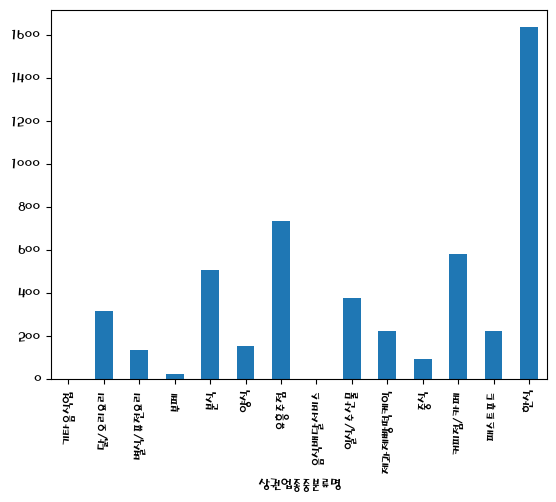

In [48]:
# 서울시의 음식업종 중에서 구별, 중분류업종수를 출력...
df_seoul_food.groupby(['시군구명','상권업종중분류명']).count()['상호명']

food_gu = df_seoul_food.groupby(['시군구명','상권업종중분류명']).count()['상호명'].unstack()
food_gu.loc['강동구'].plot(kind='bar')

<Axes: xlabel='시군구명'>

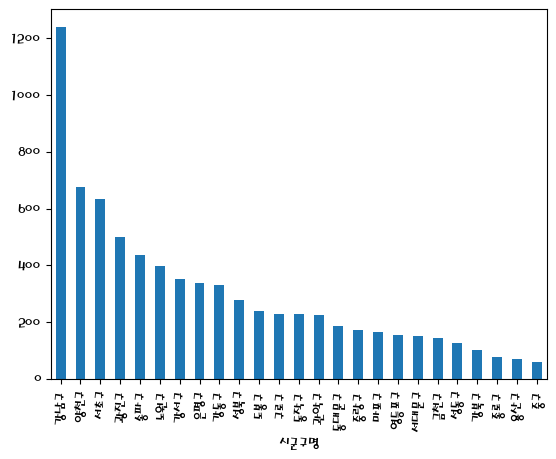

In [63]:
# 입시학원이 어느 구에 많이 분포하는지 확인...
df_seoul_edu = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '학문/교육')]

df_seoul_edu['상권업종소분류명'].unique()

df_seoul_edu_ibsi = df_seoul_edu[df_seoul_edu['상권업종소분류명'].str.contains('학원-입시')]
df_seoul_edu_ibsi['시군구명'].value_counts().head(30).plot(kind='bar')

<Axes: xlabel='경도', ylabel='위도'>

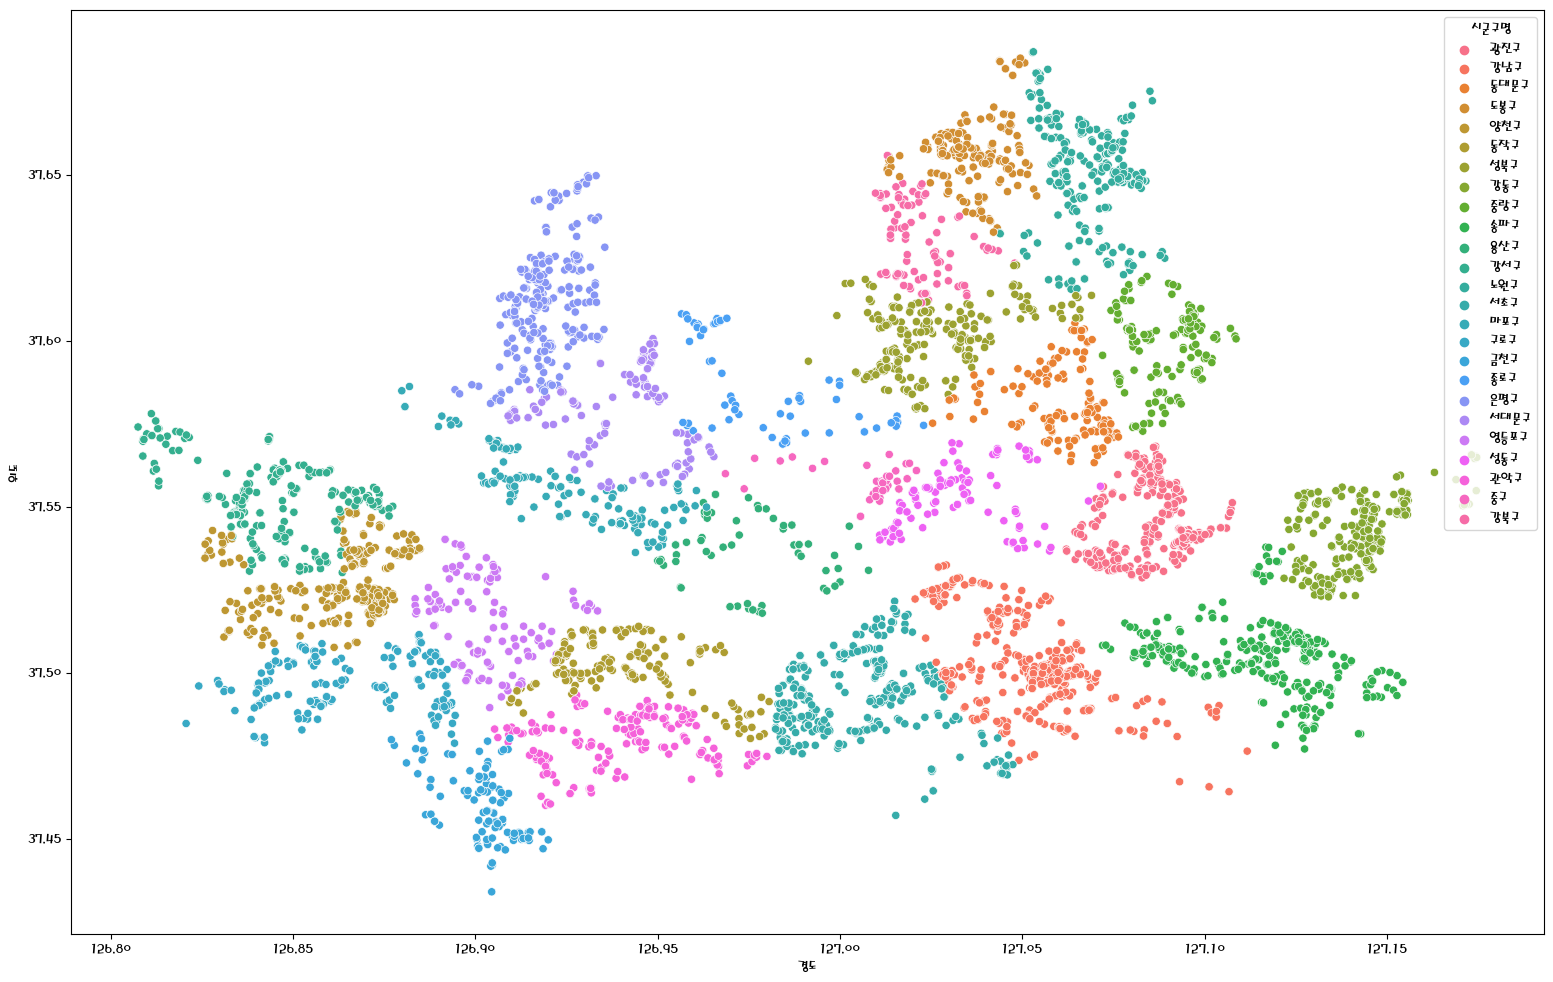

In [68]:
plt.figure(figsize=(19,12))
sns.scatterplot(data=df_seoul_edu_ibsi, x='경도', y='위도', hue='시군구명')

In [69]:
# 서울시 학원에서 어떤 종류의 학원이 많은지 상위 10개의 교육업종

df_seoul_edu['상권업종소분류명'].value_counts().head(10)

상권업종소분류명
학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
학원-기타           677
태권도장            610
Name: count, dtype: int64

In [71]:
# 교육 상위 10개의 소업종 데이터만 추출...
df_edu_sample = df_seoul_edu.groupby('상권업종소분류명')